In [192]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [193]:
#Daten einlesen
df_orig = pd.read_parquet("D:/Eclipse Python/DataScience/res/event_ano.parquet.gzip")

In [194]:
df = df_orig.set_index("event_timestamp")
df.sort_index(inplace=True)

df

,message_number,message_category,message_severity,an_title,an_description,an_line,an_cell,an_robot
event_timestamp,,,,,,,,
2015-05-04 16:04:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_21
2015-05-04 16:04:00,20205,System,Automatik-Sicherheitshalt offen,NaN,NaN,line_6,cell_11,robot_21
2015-05-04 16:04:00,20205,System,Automatik-Sicherheitshalt offen,NaN,NaN,line_6,cell_11,robot_23
2015-05-04 16:04:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_23
2015-05-04 16:04:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_24
2015-05-04 16:04:00,20205,System,Automatik-Sicherheitshalt offen,NaN,NaN,line_6,cell_11,robot_24
2015-05-04 16:05:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_22
2015-05-04 16:05:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_25
2015-05-04 16:05:00,20205,System,Automatik-Sicherheitshalt offen,NaN,NaN,line_6,cell_11,robot_25


In [195]:
line_mapping = {}
for i in range(0,28):
    line_mapping.update({"line_{}".format(i):i})

df["an_line"] = df.an_line.apply(lambda x: line_mapping[x] if x in line_mapping.keys() else x)

In [196]:
cell_mapping = {}
for i in range(0,14):
    cell_mapping.update({"cell_{}".format(i):i})

df["an_cell"] = df.an_cell.apply(lambda x: cell_mapping[x] if x in cell_mapping.keys() else x)

In [197]:
robot_mapping = {}
for i in range(0,189):
    robot_mapping.update({"robot_{}".format(i):i})

df["an_robot"] = df.an_robot.apply(lambda x: robot_mapping[x] if x in robot_mapping.keys() else x)

In [198]:
message_severity_mapping = {"Error":1,"Warning":2,"Information":3}

df["message_severity"] = df.message_severity.apply(lambda x: message_severity_mapping[x] if x in message_severity_mapping.keys() else x)

In [199]:
def dfExtractMethod(df,extract_value):
    df_extract = df.loc[df['an_line'] == extract_value]
    return df_extract

In [200]:
def dfExtractErrorWarningInformationMethod(df,extract_value):
    df_extract = df.loc[df['message_severity'] == extract_value]
    return df_extract

#df_extract_error = dfExtractErrorWarningInformationMethod(df_extract,1)
## 1 == Error
#df_extract_warning = dfExtractErrorWarningInformationMethod(df_extract,2)
## 2 == Warning
#df_extract_information = dfExtractErrorWarningInformationMethod(df_extract,3)
## 2 == Information

In [233]:
def dfRunTimePerDay(df,error_number):
    RunTimePerDay = []
    
    for i in range(0,28):
        df_extract_line = dfExtractMethod(df,i)
                
        start_time_line = df_extract_line.index[0]
        end_time_line = df_extract_line.index[-1]
        run_time_line = end_time_line - start_time_line
                
        df_extract_line_errors = dfExtractErrorWarningInformationMethod(df_extract_line,error_number)
        
        start_time_line_errors = df_extract_line_errors.index[0]
        end_time_line_errors = df_extract_line_errors.index[-1]
        run_time_line_errors = end_time_line_errors - start_time_line_errors
        
        run_time_per_day = run_time_line - run_time_line_errors
        run_time_per_day = (run_time_per_day.total_seconds()*60)
        
        RunTimePerDay.append(run_time_per_day)
    return RunTimePerDay

def dfRunTimeErrorsPerDay(df,error_number):
    RunTimeErrorsPerDay = []
    
    for i in range(0,28):
        df_extract_line = dfExtractMethod(df,i)
        
        start_time_line = df_extract_line.index[0]
        end_time_line = df_extract_line.index[-1]
        run_time_line = end_time_line - start_time_line
                
        df_extract_line_errors = dfExtractErrorWarningInformationMethod(df_extract_line,error_number)
        
        start_time_line_errors = df_extract_line_errors.index[0]
        end_time_line_errors = df_extract_line_errors.index[-1]
        run_time_line_errors = end_time_line_errors - start_time_line_errors
        
        line_errors = df_extract_line_errors.message_number.count()
        
        RunTimeErrorsPerDay.append(line_errors/((run_time_line.total_seconds())*60))
    return RunTimeErrorsPerDay

In [234]:
RunTimePerDayErrors = dfRunTimePerDay(df,1)
RunTimePerDayWarnings = dfRunTimePerDay(df,2)
RunTimePerDayInformations = dfRunTimePerDay(df,3)

In [235]:
myColumnsLineArray = np.arange(0,28)
myRunTimePerDayWarningsArray = np.asarray(RunTimePerDayWarnings)
myRunTimePerDayErrorsArray = np.asarray(RunTimePerDayErrors)
myRunTimePerDayInformationsArray = np.asarray(RunTimePerDayInformations)

df_RunTimePerDay = pd.DataFrame()
df_RunTimePerDay["Line_Run_Time"] = myColumnsLineArray
df_RunTimePerDay = df_RunTimePerDay.set_index("Line_Run_Time")
df_RunTimePerDay["Errors_Run_Time"] = myRunTimePerDayErrorsArray
#df_RunTimePerDay["Warnings_Run_Time"] = myRunTimePerDayWarningsArray
#df_RunTimePerDay["Informations_Run_Time"] = myRunTimePerDayInformationsArray
df_RunTimePerDay = df_RunTimePerDay.astype(int)
df_RunTimePerDay

,Errors_Run_Time
Line_Run_Time,
0,52380
1,3659820
2,666660
3,896940
4,570585960
5,2401080
6,604497180
7,7114380
8,13155000


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64', name='Line_Run_Time')
[    52380   3659820    666660    896940 570585960   2401080 604497180
   7114380  13155000  10304760  14515800  19434300  14448660   8649480
   6756900    376980   8877780   3919980   3586680 754213740   7098840
   8742360  47980620 741632400 741315780       180    556200    226200]


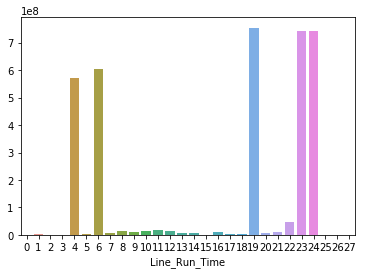

In [240]:
print(df_RunTimePerDay.index)
print(df_RunTimePerDay.Errors_Run_Time.values)
sns.barplot(x=df_RunTimePerDay.index, y=df_RunTimePerDay.Errors_Run_Time.values)
plt.show()

In [106]:
RunTimeErrorsPerDayErrors = dfRunTimeErrorsPerDay(df,1)
RunTimeErrorsPerDayWarnings = dfRunTimeErrorsPerDay(df,2)
RunTimeErrorsPerDayInformations = dfRunTimeErrorsPerDay(df,3)

In [108]:
myRunTimeErrorsPerDayErrorsArray = np.asarray(RunTimeErrorsPerDayErrors)
df_RunTimeErrorsPerDayErrors = pd.DataFrame()
df_RunTimeErrorsPerDayErrors["Errors_Run_Time"] = myRunTimeErrorsPerDayErrorsArray

myRunTimeErrorsPerDayWarningsArray = np.asarray(RunTimeErrorsPerDayWarnings)
df_RunTimeErrorsPerDayWarnings = pd.DataFrame()
df_RunTimeErrorsPerDayWarnings["Warning_Run_Time"] = myRunTimeErrorsPerDayWarningsArray

myRunTimeErrorsPerDayInformationsArray = np.asarray(RunTimeErrorsPerDayInformations)
df_RunTimeErrorsPerDayInformations = pd.DataFrame()
df_RunTimeErrorsPerDayInformations["Informations_Run_Time"] = myRunTimeErrorsPerDayInformationsArray